In [1]:
from keras import layers

layer = layers.Dense(32, input_shape=(784,)) 

/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


A dense layer with 32 output units.

We’re creating a layer that will only accept as input 2D tensors where the first dimension is 784 (axis 0, the batch dimension, is unspecified, and thus any value would be accepted). This layer will return a tensor where the first dimension has been transformed to be 32.

In [2]:
layer.dtype

'float32'

In [4]:
layer.get_weights()

[]

In [8]:
layer.input_spec

InputSpec(min_ndim=2)

In [15]:
from keras import models

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

As a refresher, here’s a two-layer model defined using the Sequential class (note that we’re passing the expected shape of the input data to the first layer):

In [16]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

And here’s the same model defined using the functional API:

In [17]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

In [ ]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

## The IMDB dataset

In [18]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [41]:
len(train_data)

25000

In [19]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [20]:
train_labels[0]

1

In [21]:
max([max(sequence) for sequence in train_data])

9999

In [22]:
word_index = imdb.get_word_index()                                    
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
len(reverse_word_index)

1646592/1641221 [==============================] - 2s 1us/step


88584

In [34]:
reverse_word_index[14]

'as'

In [36]:
reverse_word_index[11]

'this'

In [31]:
list(reverse_word_index)[:10]

[34701, 52006, 52007, 16816, 63951, 1408, 16115, 2345, 2289, 52008]

In [24]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) 
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [69]:
import numpy as np

def vectorize_sequences(examples, dimension=10000):
    results = np.zeros((len(examples), dimension))        
    for i, example in enumerate(examples):
        results[i, example] = 1.
    return results

x_train = vectorize_sequences(train_data)                  
x_test = vectorize_sequences(test_data)                    

In [38]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [49]:
x_train[0]
# train_data[0] = [1, 14, 22, 16, 43, 530, ..., 2, ... , 32]

array([0., 1., 1., ..., 0., 0., 0.])

In [48]:
x_train[0,2]

1.0

In [70]:
x_train.shape

(25000, 10000)

In [39]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [43]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [167]:
y_train.shape

(8982,)

In [50]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Having more hidden units (a higher-dimensional representation space) allows your network to learn more-complex representations, but it makes the network more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).

In [75]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # a 2D input with shape `(batch_size=512, input_dim)`
# now the model will take as input arrays of shape (*, 10000)
# and output arrays of shape (*, 16)

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [53]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [71]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [58]:
x_val.shape

(10000, 10000)

In [59]:
y_val.shape

(10000,)

In [72]:
partial_x_train.shape

(15000, 10000)

In [57]:
partial_y_train.shape

(15000,)

In [92]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 322us/step - loss: 0.5223 - acc: 0.7839 - val_loss: 0.3931 - val_acc: 0.8681
Epoch 2/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.3154 - acc: 0.8979 - val_loss: 0.3157 - val_acc: 0.8811
Epoch 3/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.2296 - acc: 0.9250 - val_loss: 0.2791 - val_acc: 0.8911
Epoch 4/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.1808 - acc: 0.9398 - val_loss: 0.2896 - val_acc: 0.8822
Epoch 5/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.1452 - acc: 0.9520 - val_loss: 0.2792 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.1174 - acc: 0.9633 - val_loss: 0.2918 - val_acc: 0.8867
Epoch 7/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.0969 - acc: 0.9712 - val_loss: 0.3089 - 

In [78]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [85]:
 history_dict['loss']

[0.013408675822367272,
 0.002821602704996864,
 0.004868814384068052,
 0.001670327595497171,
 0.0024224543000260987,
 0.0009950193325368067,
 0.0038616319874456772,
 0.0004986890124001851,
 0.0004276813867812355,
 0.0021158883939885226,
 0.0002632151600594322,
 0.0018842887985209625,
 0.0002953393132969116,
 0.00013888437823625282,
 0.00011035978570968533,
 0.004105713878847503,
 7.921583863984173e-05,
 5.940569319063798e-05,
 4.915755016263574e-05,
 0.002042299493495375]

In [86]:
history_dict['val_loss']

[0.7364483612060547,
 0.7610338283538818,
 0.793438773059845,
 0.8247161198616028,
 0.8831801710128784,
 0.8933867009162902,
 0.9277825045585633,
 0.9438711010932922,
 1.0526722896575929,
 0.9903027072906494,
 1.0108531185150147,
 1.096514951133728,
 1.0616077423095702,
 1.0718595756530762,
 1.0950103881835938,
 1.133065721511841,
 1.134200180244446,
 1.1429854751586914,
 1.1600288299560546,
 1.203471499824524]

In [87]:
history_dict['acc']

[0.9967333333333334,
 0.9998666666666667,
 0.9990666666666667,
 0.9998666666666667,
 0.9996,
 0.9999333333333333,
 0.9988666666666667,
 0.9999333333333333,
 1.0,
 0.9994666666666666,
 1.0,
 0.999533333047231,
 1.0,
 1.0,
 1.0,
 0.9988666666666667,
 1.0,
 1.0,
 1.0,
 0.9994666666666666]

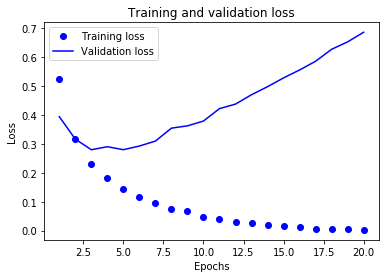

In [93]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

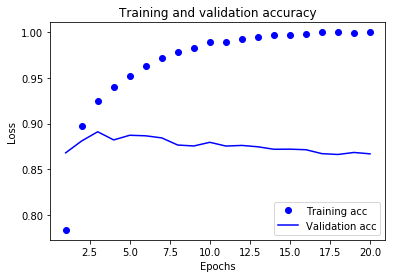

In [96]:
plt.clf()                                      

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [98]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 201us/step - loss: 0.4373 - acc: 0.8318
Epoch 2/4
25000/25000 [==============================] - 3s 121us/step - loss: 0.2538 - acc: 0.9108 1s - loss: 0.2
Epoch 3/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.1967 - acc: 0.9293
Epoch 4/4
25000/25000 [==============================] - 5s 186us/step


In [99]:
results

[0.2955860692548752, 0.8834]

In [100]:
model.predict(x_test)

array([[0.20149086],
       [0.99990964],
       [0.85874295],
       ...,
       [0.12372829],
       [0.09180134],
       [0.6375109 ]], dtype=float32)

In [103]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=7, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/7
25000/25000 [==============================] - 5s 209us/step - loss: 0.4393 - acc: 0.8176
Epoch 2/7
25000/25000 [==============================] - 3s 118us/step - loss: 0.2537 - acc: 0.9087
Epoch 3/7
25000/25000 [==============================] - 3s 118us/step - loss: 0.1956 - acc: 0.9297
Epoch 4/7
25000/25000 [==============================] - 3s 122us/step - loss: 0.1625 - acc: 0.9416
Epoch 5/7
25000/25000 [==============================] - 3s 116us/step - loss: 0.1415 - acc: 0.9498
Epoch 6/7
25000/25000 [==============================] - 3s 121us/step - loss: 0.1187 - acc: 0.9592
Epoch 7/7
25000/25000 [==============================] - 4s 177us/step


In [104]:
results

[0.39280606945037844, 0.86504]

## The Reuters dataset

In [105]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [106]:
len(train_data)

8982

In [107]:
len(test_data)

2246

In [108]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [110]:
ord_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])                                                          

557056/550378 [==============================] - 1s 2us/step


In [111]:
decoded_newswire

"? ? ? to just br loved and you i've set and broke many was friends seems him see of how and with movies a with know that him see people film guess are of if the some to okay from without old a though a into in that film thing in that of if is scarecrow outside days a found a looks in that film these about in that was to thought 100 him see good he without be all man a character that as it"

In [121]:
train_labels[0]

3

In [117]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [113]:
x_train = vectorize_sequences(train_data)            
x_test = vectorize_sequences(test_data)

In [116]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [114]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels)          

In [123]:
to_one_hot([3])

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [115]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [120]:
one_hot_train_labels[0,3]

1.0

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
# categorical encoding (also known as one-hot encoding)

In [122]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

* You end the network with a Dense layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
* The last layer uses a softmax activation. You saw this pattern in the MNIST example. It means the network will output a probability distribution over the 46 different output classes—for every input sample, the network will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.

In [124]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [125]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [126]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 391us/step - loss: 2.5320 - acc: 0.4961 - val_loss: 1.7186 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 178us/step - loss: 1.4452 - acc: 0.6877 - val_loss: 1.3479 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 2s 188us/step - loss: 1.0960 - acc: 0.7641 - val_loss: 1.1718 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 160us/step - loss: 0.8708 - acc: 0.8148 - val_loss: 1.0790 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.7045 - acc: 0.8472 - val_loss: 0.9855 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.5680 - acc: 0.8790 - val_loss: 0.9404 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.4609 - acc: 0.9034 - val_loss: 0.9107 - val_acc: 0.8030


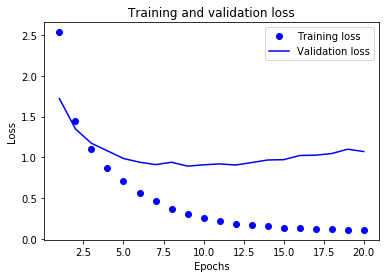

In [127]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

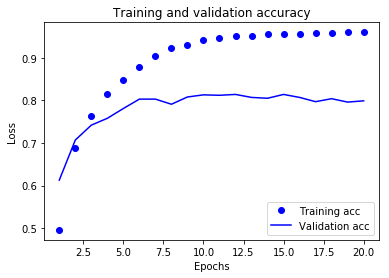

In [129]:
plt.clf()                                                

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from scratch for nine epochs and then evaluate it on the test set.

In [130]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 248us/step - loss: 2.5390 - acc: 0.5226 - val_loss: 1.6732 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 153us/step - loss: 1.3720 - acc: 0.7124 - val_loss: 1.2764 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 155us/step - loss: 1.0147 - acc: 0.7785 - val_loss: 1.1323 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 176us/step - loss: 0.7984 - acc: 0.8249 - val_loss: 1.0551 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 2s 201us/step - loss: 0.6396 - acc: 0.8629 - val_loss: 0.9750 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 186us/step - loss: 0.5121 - acc: 0.8925 - val_loss: 0.9110 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 181us/step - loss: 0.4118 - acc: 0.9148 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [131]:
results

[1.02155509912214, 0.7764915405695499]

In [132]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [133]:
predictions = model.predict(x_test)

In [134]:
predictions[0].shape

(46,)

In [136]:
predictions[0]

array([1.06677771e-05, 8.73926692e-05, 2.86875056e-05, 9.70408142e-01,
       1.76021773e-02, 1.32796046e-07, 9.74166178e-05, 3.30521325e-05,
       3.49465851e-03, 2.23100301e-06, 3.43540341e-05, 1.59783731e-03,
       5.56305858e-05, 3.00892862e-05, 5.34681703e-06, 1.91953695e-05,
       1.05304702e-03, 2.13219450e-04, 3.08317685e-04, 1.23700418e-03,
       8.08532641e-04, 4.67354548e-04, 7.31301452e-06, 6.11757860e-05,
       1.31690140e-05, 3.23837565e-04, 2.83122540e-06, 2.88975079e-05,
       8.11649079e-06, 1.09568566e-04, 3.53575655e-04, 2.02399548e-04,
       1.23748250e-05, 4.22340236e-05, 3.69546942e-05, 2.12904397e-05,
       1.66245140e-04, 4.58862414e-05, 9.77300151e-05, 3.06088186e-04,
       3.88014960e-05, 4.74016706e-04, 2.16668059e-06, 3.43028296e-05,
       6.68105486e-06, 9.95759092e-06], dtype=float32)

In [135]:
np.sum(predictions[0])

1.0000001

The largest entry is the predicted class—the class with the highest probability:

In [137]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [138]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [139]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [140]:
y_test

array([ 3, 10,  1, ...,  3,  3, 24])

The loss function used in listing 3.21, categorical_crossentropy, expects the labels to follow a categorical encoding. With integer labels, you should use sparse_categorical_crossentropy:

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

### The importance of having sufficiently large intermediate layers

We mentioned earlier that because the final outputs are 46-dimensional, you should avoid intermediate layers with many fewer than 46 hidden units.

In [141]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 326us/step - loss: 2.6569 - acc: 0.3766 - val_loss: 1.9677 - val_acc: 0.5290
Epoch 2/20
7982/7982 [==============================] - 2s 250us/step - loss: 1.6678 - acc: 0.6209 - val_loss: 1.5424 - val_acc: 0.6230
Epoch 3/20
7982/7982 [==============================] - 2s 205us/step - loss: 1.3341 - acc: 0.6711 - val_loss: 1.3958 - val_acc: 0.6770
Epoch 4/20
7982/7982 [==============================] - 2s 220us/step - loss: 1.1429 - acc: 0.7263 - val_loss: 1.3231 - val_acc: 0.6970
Epoch 5/20
7982/7982 [==============================] - 2s 218us/step - loss: 1.0115 - acc: 0.7461 - val_loss: 1.2710 - val_acc: 0.7030
Epoch 6/20
7982/7982 [==============================] - 2s 200us/step - loss: 0.9104 - acc: 0.7572 - val_loss: 1.2793 - val_acc: 0.7040
Epoch 7/20
7982/7982 [==============================] - 2s 218us/step - loss: 0.8312 - acc: 0.7727 - val_loss: 1.2614 - val_acc: 0.7110


The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop is mostly due to the fact that you’re trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. 

## PREDICTING HOUSE PRICES: A REGRESSION EXAMPLE

predicting a continuous value instead of a discrete label: for instance, predicting the temperature tomorrow, given meteorological data; or predicting the time that a software project will take to complete, given its specifications

In [143]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 5us/step


In [144]:
train_data.shape

(404, 13)

In [147]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [148]:
test_data[0]

array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

In [145]:
test_data.shape

(102, 13)

In [151]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

The prices are typically between `$5,000` and `$50,000`.

feature-wise normalization: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation.

In [152]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [154]:
test_data[0]

array([ 1.55369355, -0.48361547,  1.0283258 , -0.25683275,  1.03838067,
        0.23545815,  1.11048828, -0.93976936,  1.67588577,  1.5652875 ,
        0.78447637, -3.48459553,  2.25092074])

In [156]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()                                  
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

The network ends with a single unit and no activation (it will be a linear layer). This is a typical setup for scalar regression (a regression where you’re trying to predict a single continuous value). **the last layer is purely linear, the network is free to learn to predict values in any range.**

Note that you compile the network with the mse loss function—mean squared error, the square of the difference between the predictions and the targets. This is a widely used loss function for regression problems.



The best practice in such situations is to use K-fold cross-validation (see figure 3.11). It consists of splitting the available data into K partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K – 1 partitions while evaluating on the remaining partition. 

In [157]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)

    
    model = build_model()                                                    
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)      
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [158]:
all_scores

[2.013490641471183, 2.3284358246491688, 2.796003714646443, 2.362281344904758]

In [159]:
np.mean(all_scores)

2.375052881417888

In [160]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)

    model = build_model()                                                    
    history = model.fit(partial_train_data, partial_train_targets,           
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [161]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

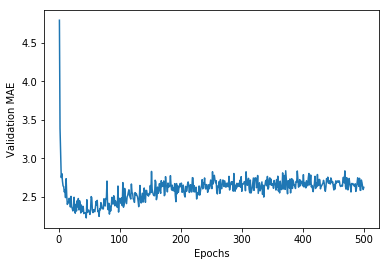

In [162]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

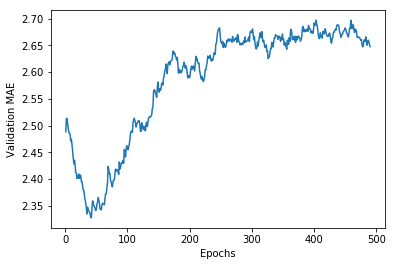

In [163]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

According to this plot, validation MAE stops improving significantly after 80 epochs. Past that point, you start overfitting.

Once you’re finished tuning other parameters of the model (in addition to the number of epochs, you could also adjust the size of the hidden layers), you can train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data.

In [164]:
model = build_model()                                                   
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


Here’s the final result:

In [165]:
test_mae_score

2.681295357498468

You’re still off by about $2,680.

after a certain number of iterations on the training data, generalization stops improving, and validation metrics stall and then begin to degrade: the model is starting to overfit. That is, it’s beginning to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new data.